In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [3]:
import numpy as np
import pandas as pd
import datetime as dt
#delete the below
from datetime import datetime

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
#**************
#*** my work **
#**************

# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [6]:
# View all of the classes that automap found


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
#**************
#*** my work **
#**************

# Find the most recent date in the data set.
#session.query(Measurement.date).order_by(Measurement.date.desc()).first()
measurement_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
measurement_date

('2017-08-23',)

In [11]:
#parse out the day, month, year from the datetime object
date_string = measurement_date[0]
# Convert the date string to a datetime object
date_object = datetime.strptime(date_string, '%Y-%m-%d')

# Extract the month, day, and year from the datetime object
my_month = int(date_object.strftime('%m'))
my_day = int(date_object.strftime('%d'))
my_year = int(date_object.strftime('%Y'))
print("Month:", my_month)
print("Day:", my_day)
print("Year:", my_year)

Month: 8
Day: 23
Year: 2017


In [9]:
# Find the most recent date in the data set.


('2017-08-23',)

In [12]:
#**************
#*** my work **
#**************
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
recent_date = dt.date(my_year,my_month,my_day)
print(f"Most recent date: {recent_date}")
year_ago = dt.date(my_year,my_month,my_day) - dt.timedelta(days=366)
print(f"One year prior: {year_ago}")

Most recent date: 2017-08-23
One year prior: 2016-08-22


In [13]:
# Perform a query to retrieve the data and precipitation scores
#session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >year_ago).all()
#session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= recent_date).all()
#original
results=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >year_ago).filter(Measurement.date <= recent_date).all()

In [60]:
#version 02
results = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date >year_ago).filter(Measurement.date <= recent_date).\
                        order_by(Measurement.date).all()

In [61]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = ["Measurement Date","Precipitation"]
precipitation_df = pd.DataFrame(results, columns = column_names)
precipitation_df.head()

,Measurement Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


<Figure size 800x600 with 0 Axes>

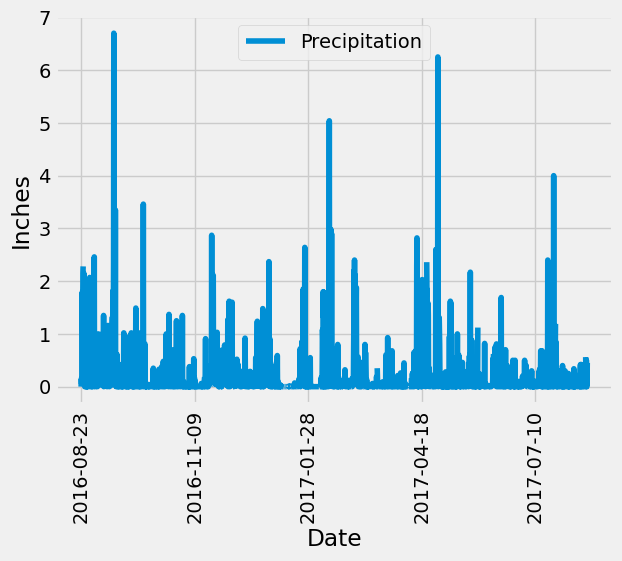

In [63]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(8, 6))  # Set the figure size
#plt.bar(precipitation_df['Measurement Date'],precipitation_df['Precipitation'],color='skyblue') #create the bar chart
precipitation_df.plot(x='Measurement Date', y= 'Precipitation')
plt.xlabel('Date') #set the label for the x-axis
plt.ylabel('Inches') #set the label for the y-axis
plt.xticks(rotation=90) 
plt.show()  #display the chart

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data


In [64]:
#************
#** my work**
#************

# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats = precipitation_df['Precipitation'].describe()
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
#***********
#** my work**
#***********
# Design a query to calculate the total number of stations in the dataset
total_count = session.query(Measurement.station).distinct().count()
print(total_count)

9


In [12]:
# Design a query to calculate the total number of stations in the dataset


[(9,)]

In [19]:
#***********
#** my work**
#***********
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations= session.query(Measurement.station,func.count(Measurement.tobs).label('count')).\
                               group_by(Measurement.station).\
                               order_by(func.count(Measurement.tobs).desc()).all()  
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
#***********
#** my work**
#***********

#find the most active station programmatically. Doing so will enable me to use this code without having to manually enter the most active station
most_active_station= session.query(Measurement.station,func.count(Measurement.tobs).label('count')).\
                                group_by(Measurement.station).\
                                order_by(func.count(Measurement.tobs).desc()).first()  

#save the most active station as a variable, and check it against the results from the preceding query.
station_id = most_active_station.station
station_id

#find the metrics of interest
most_active_statistics = session.query(func.min(Measurement.tobs).label('min_value'),
                                        func.max(Measurement.tobs).label('max_value'),
                                        func.avg(Measurement.tobs).label('avg_value'))\
                                 .filter(Measurement.station == station_id)\
                                 .first()
#print the results
print(most_active_statistics)

(54.0, 85.0, 71.66378066378067)


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

In [21]:
#**************
#** my work  **
#**************
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



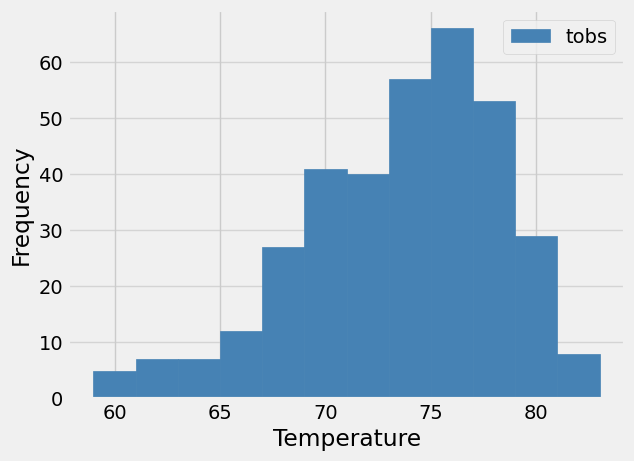

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperatures=session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >year_ago).filter(Measurement.date <= recent_date).filter(Measurement.station == station_id).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
column_names = ["Measurement Date","Temperature"]
temps_df = pd.DataFrame(temperatures, columns = column_names)
temps_df.head()

plt.hist(temps_df['Temperature'], bins=12, color='steelblue', edgecolor='steelblue', label="tobs")
plt.xlabel('Temperature')
plt.ylabel('Frequency')
#plt.title('Temperature Observation Data for the Last 12 Months')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()


# Close Session

In [52]:
# Close Session
session.close()